In [3]:
# Import Dependencies:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np
from scipy.stats import chi2_contingency

Pre-COVID Period - 2014:

In [4]:
dataframe_2014 = pd.read_csv("Resources/OSMI 2014 Mental Health in Tech Survey Results.csv")
dataframe_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


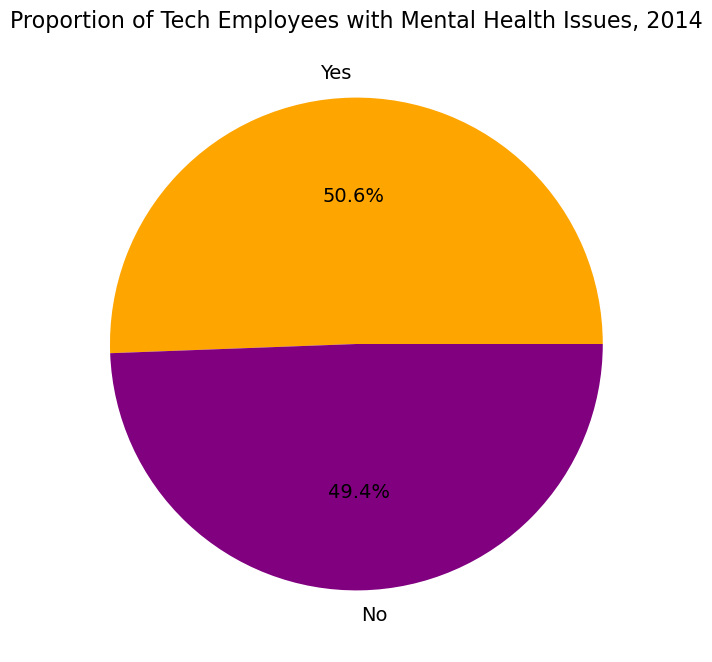

In [57]:
mental_health_issues_dataframe_2014_breakdown = dataframe_2014['treatment'].value_counts()
colors = ["orange", "purple",]
plt.figure(figsize=(14,8))
plt.pie(mental_health_issues_dataframe_2014_breakdown, 
        labels=mental_health_issues_dataframe_2014_breakdown.index, 
        colors=colors, 
        autopct='%1.1f%%', 
        textprops={'fontsize': 14})
plt.title('Proportion of Tech Employees with Mental Health Issues, 2014', fontsize = 16)
plt.savefig('Exhibits/Proportion of Tech Employees with Mental Health Issues 2014.png')
plt.show()

In [6]:
#Reducing down the data frame to give only those with mental health issues and the list of countries:
mental_health_issues_dataframe_2014 = dataframe_2014[dataframe_2014['treatment'] == 'Yes']
mental_health_issues_dataframe_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN


In [7]:
# Further reduce the dataframe down to just countries:
mental_health_issues_dataframe_2014_countries = mental_health_issues_dataframe_2014[['treatment', 'Country']]
mental_health_issues_dataframe_2014_countries.head()

,treatment,Country
0,Yes,United States
3,Yes,United Kingdom
6,Yes,United States
8,Yes,United States
10,Yes,United States


<function matplotlib.pyplot.show(close=None, block=None)>

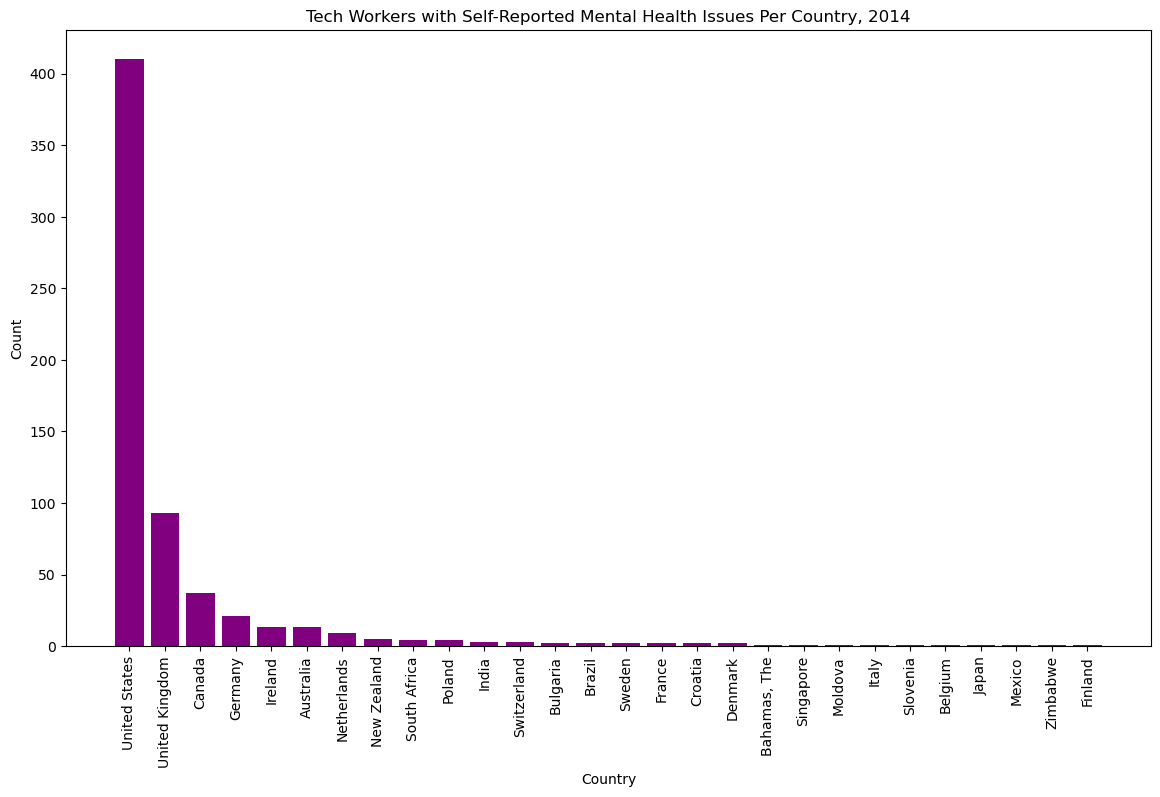

In [59]:
# Counting the number of occurences of mental health issues per country:
country_count_2014 = mental_health_issues_dataframe_2014_countries['Country'].value_counts()

# Plotting the occurences per country in a bar graph:
plt.figure(figsize=(14,8))
plt.tight_layout()
plt.bar(country_count_2014.index, country_count_2014.values, color="purple")
plt.title('Tech Workers with Self-Reported Mental Health Issues Per Country, 2014')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.savefig('Exhibits/Tech Workers With MH Issues Per Country 2014.png')
plt.show

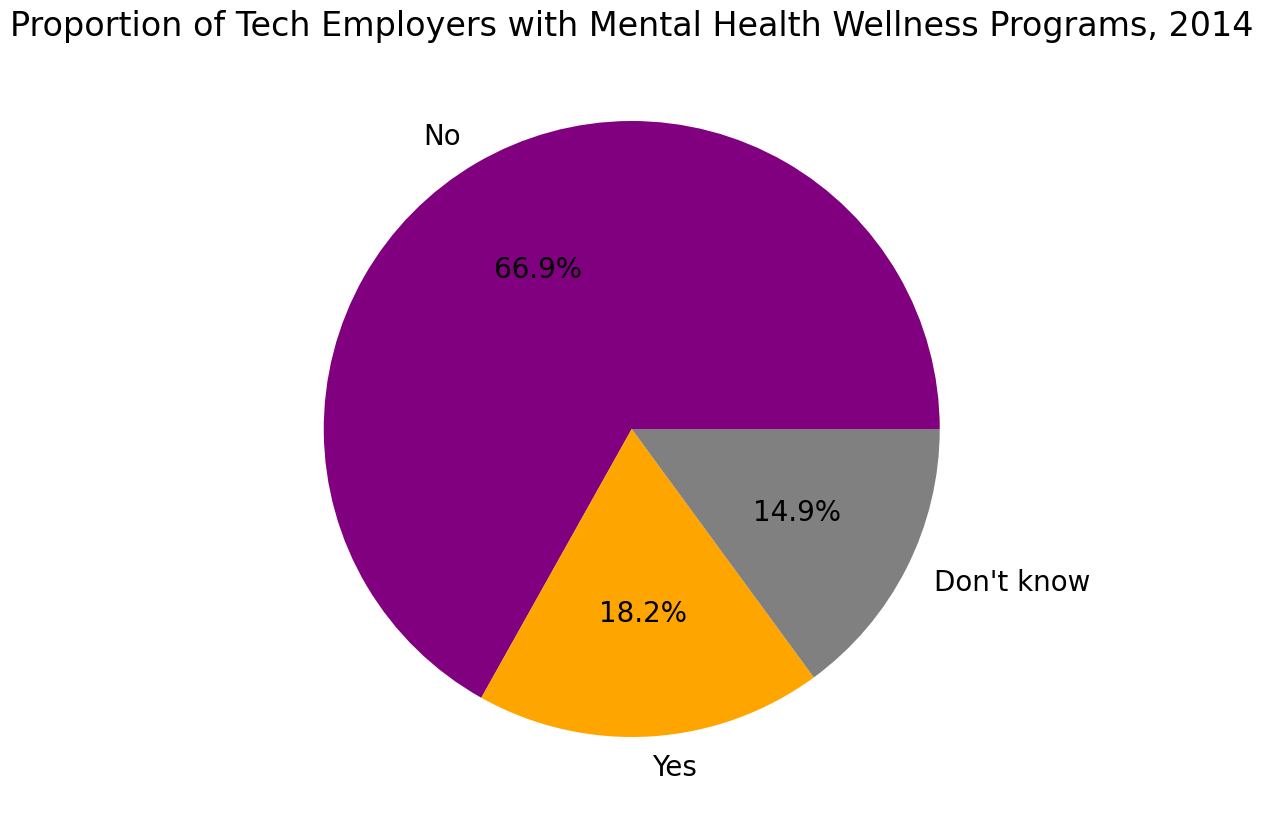

In [61]:
#Breaking down value counts of employers with mental health wellness programs
wellness_count_2014 = dataframe_2014['wellness_program'].value_counts()

#Plotting the percentage of employers with wellness programs
colors = ["purple", "orange", "grey"]
plt.figure(figsize=(14,10))
plt.pie(wellness_count_2014, labels=wellness_count_2014.index, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Proportion of Tech Employers with Mental Health Wellness Programs, 2014', fontsize = 24)
plt.savefig('Exhibits/Prop of Tech Employers With Wellness Programs 2014.png')
plt.show()

In [10]:
#Creating a dataframe for employees that their employers have wellness programs and they have self reported mental health issues
wellness_program_with_mental_health_issues = mental_health_issues_dataframe_2014[mental_health_issues_dataframe_2014['wellness_program'] == 'Yes']

mental_health_count_with_program = len(wellness_program_with_mental_health_issues)

#Creating a dataframe for employees that their employers do not have or are not aware of wellness programs and they have self reported mental health issues
no_wellness_program_with_mental_health_issues = mental_health_issues_dataframe_2014[(mental_health_issues_dataframe_2014['wellness_program'] == 'No') | (mental_health_issues_dataframe_2014['wellness_program'] == "Don't Know")]
mental_health_count_without_program = len(no_wellness_program_with_mental_health_issues)

#adding the numbers to a list for plotting
sizes = [mental_health_count_without_program, mental_health_count_with_program]
labels = ['Mental Health Issues Count without a Wellness Program', 'Mental Health Issues Count with a Wellness Program']
print(no_wellness_program_with_mental_health_issues['wellness_program'])


0       No
3       No
6       No
8       No
10      No
        ..
1251    No
1254    No
1255    No
1256    No
1258    No
Name: wellness_program, Length: 420, dtype: object


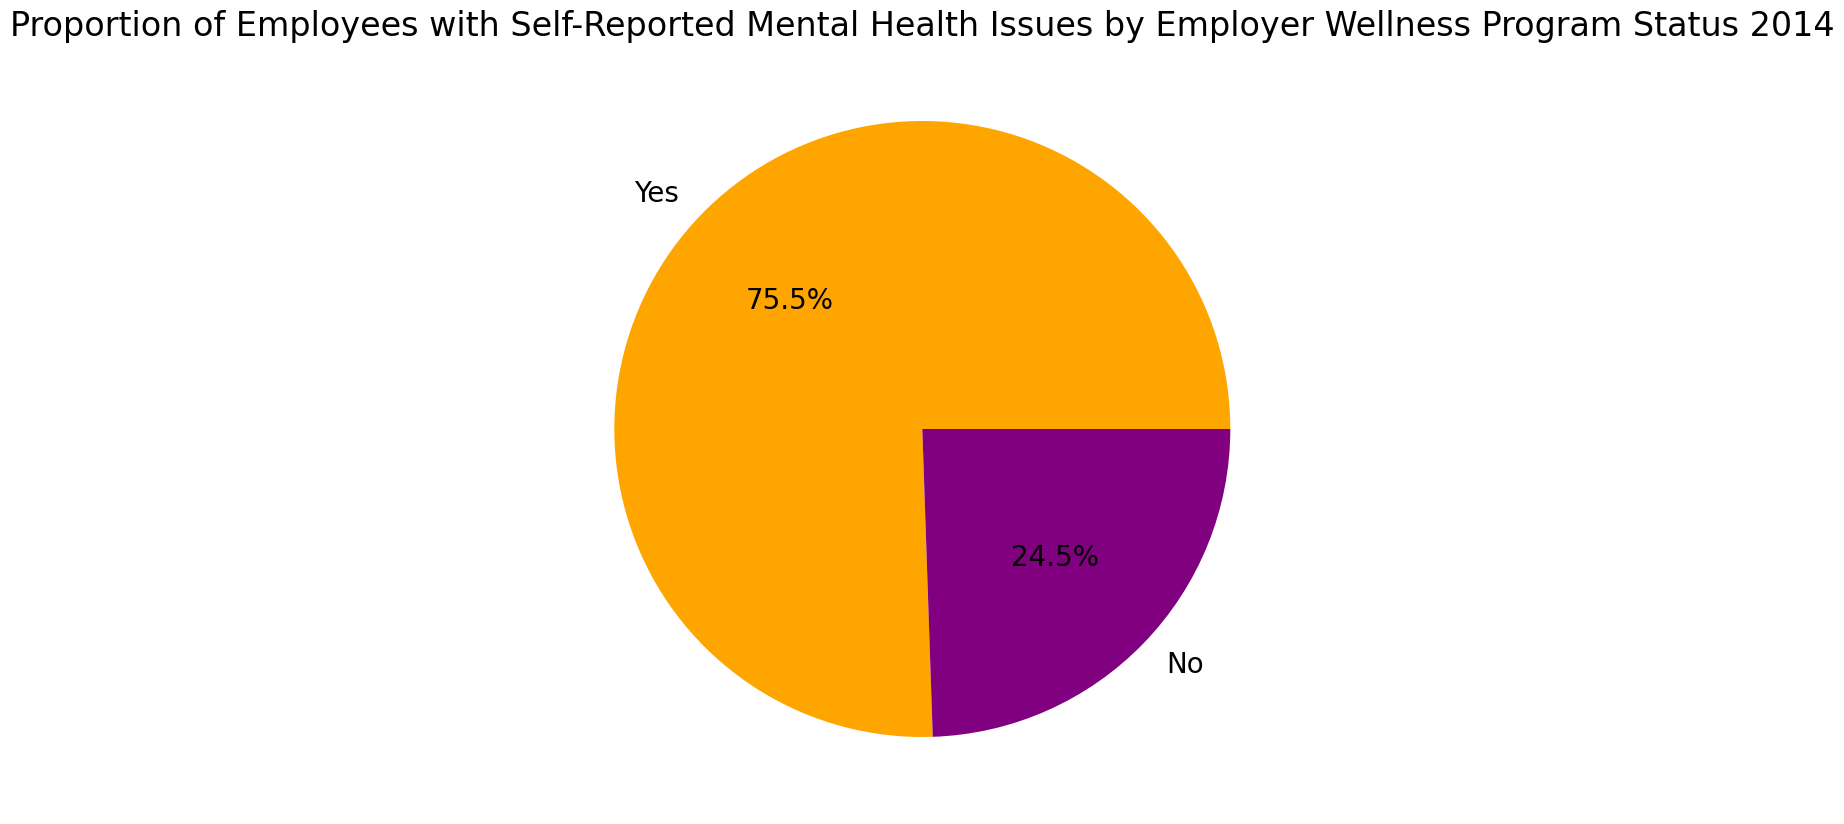

In [69]:
#Plotting the percentage of employees reporting MH issues by employer wellness programs status:
colors=["orange", "purple"]
plt.figure(figsize=(14,10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Proportion of Employees with Self-Reported Mental Health Issues by Employer Wellness Program Status 2014', fontsize = 24 )
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues by Employer Wellness Programs 2014.png')
plt.show()

In [12]:
# Remote working employees with mental health issues
remote_workers_with_mental_health_issues_2014 = len(mental_health_issues_dataframe_2014[mental_health_issues_dataframe_2014['remote_work'] == 'Yes'])
print(remote_workers_with_mental_health_issues_2014)

198


In [13]:
#Non Remote working employees with mental health issues
non_remote_workers_with_mental_health_issues_2014 = len(mental_health_issues_dataframe_2014[mental_health_issues_dataframe_2014['remote_work'] == 'No'])
print(non_remote_workers_with_mental_health_issues_2014)

439


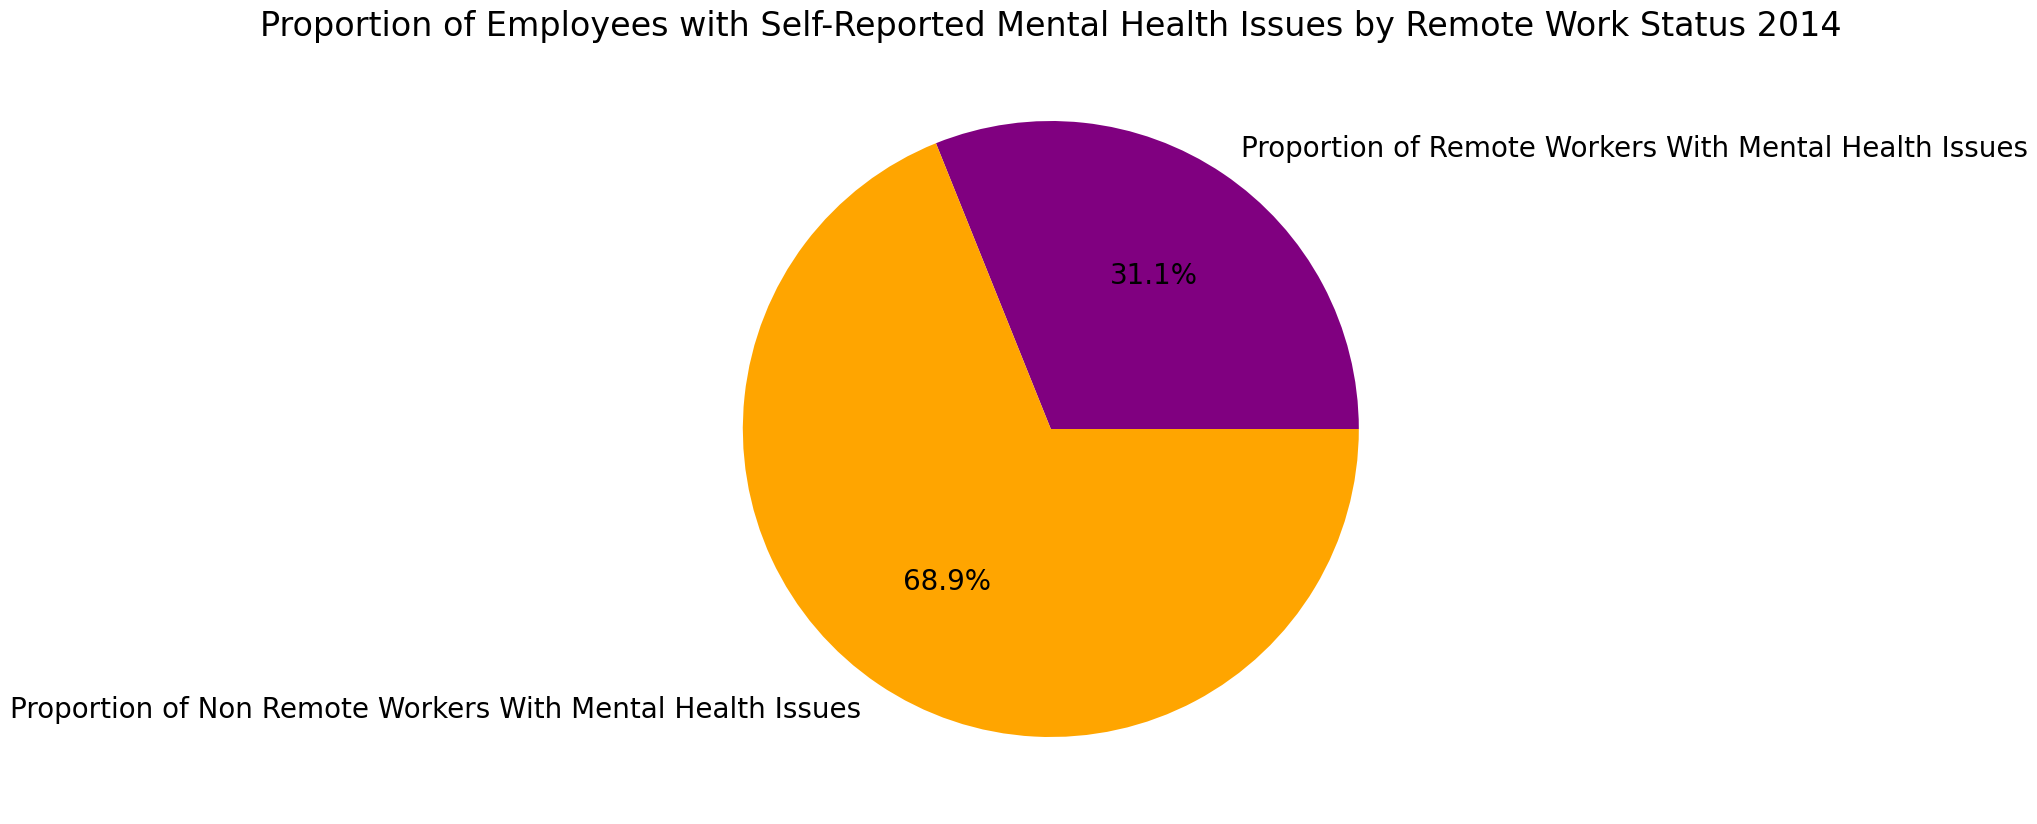

In [70]:
size_remote = [remote_workers_with_mental_health_issues_2014, non_remote_workers_with_mental_health_issues_2014]
labels_remote = ['Proportion of Remote Workers With Mental Health Issues', 'Proportion of Non Remote Workers With Mental Health Issues']
colors = ["purple", "orange"]
plt.figure(figsize=(14,10))
plt.pie(size_remote, labels=labels_remote, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Proportion of Employees with Self-Reported Mental Health Issues by Remote Work Status 2014', fontsize = 24)
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues by Remote Work Status 2014.png')
plt.show()

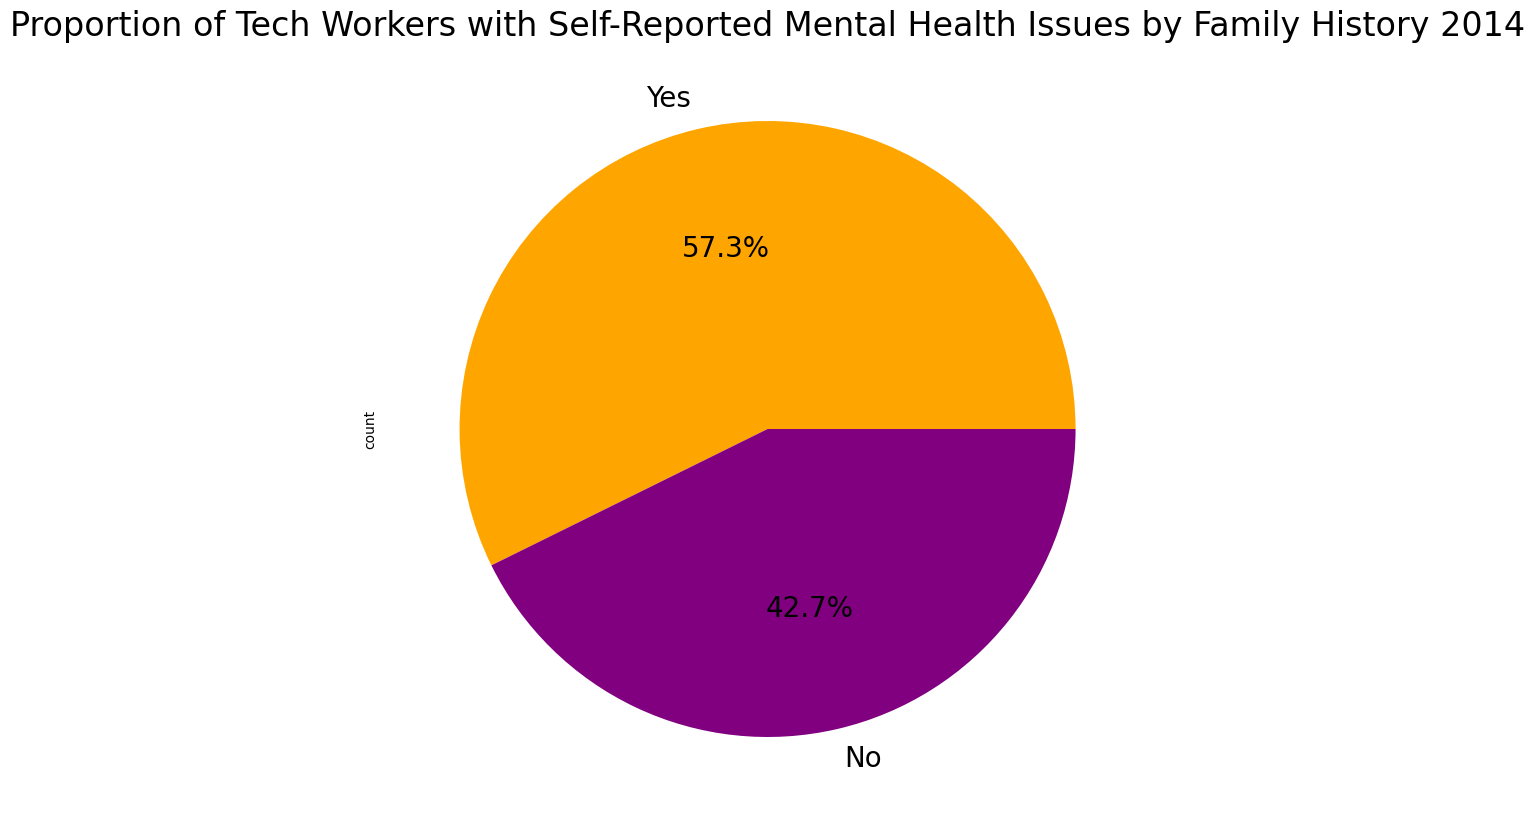

In [96]:
# Pie chart by family history of mental illness
family_history_2014=mental_health_issues_dataframe_2014['family_history'].value_counts()
colors = ["orange", "purple"]
plt.figure(figsize=(14,10))
family_history_2014.plot(kind='pie',
                    autopct='%1.1f%%',
                    colors=colors,
                    title='Proportion of Tech Workers with Self-Reported Mental Health Issues by Family History 2014', textprops={'fontsize': 20})
plt.title('Proportion of Tech Workers with Self-Reported Mental Health Issues by Family History 2014', fontsize=24)
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues by Family History 2014.png')

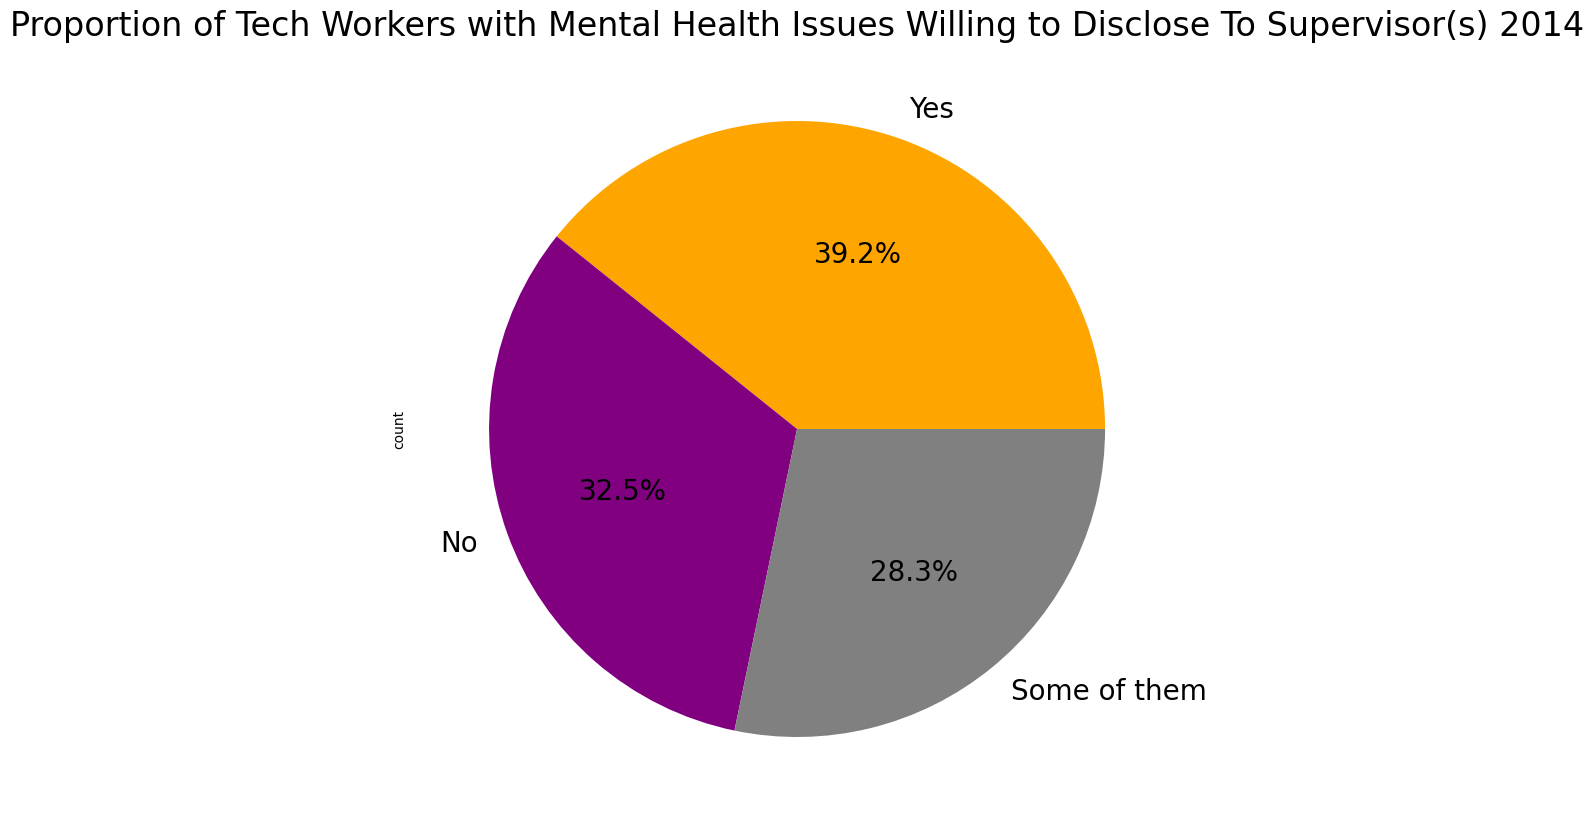

In [78]:
#5. Pie chart by workplace culture - Supervisors
workplace_culture_supervisors=mental_health_issues_dataframe_2014['supervisor'].value_counts()
colors = ["orange", "purple", "grey"]
plt.figure(figsize=(14,10))
workplace_culture_supervisors.plot(kind='pie',
                       autopct='%1.1f%%',
                       colors=colors,
                       title='Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Supervisor(s) 2014', textprops={'fontsize': 20})
plt.title('Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Supervisor(s) 2014', fontsize = 24)
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues Willing To Disclose To Supervisor 2014.png')

In [17]:
workplace_culture_supervisors=mental_health_issues_dataframe_2014['supervisor'].value_counts()
workplace_culture_supervisors.head()

supervisor
Yes             250
No              207
Some of them    180
Name: count, dtype: int64

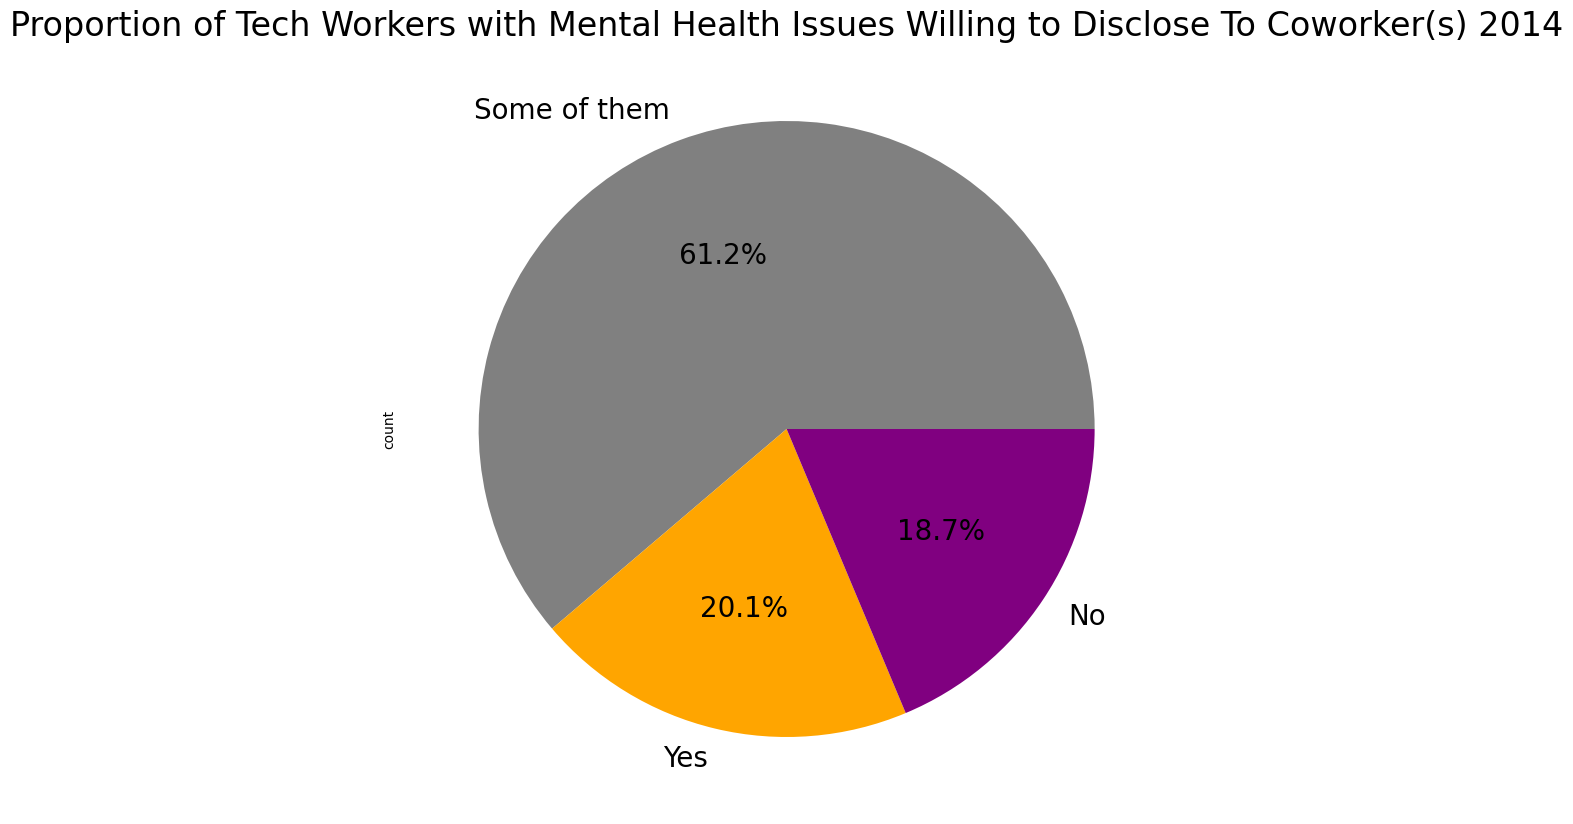

In [89]:
#5. Pie chart by workplace culture - Co-Workers
workplace_culture_coworkers=mental_health_issues_dataframe_2014['coworkers'].value_counts()
colors = ["grey", "orange", "purple"]
plt.figure(figsize=(14,10))
workplace_culture_coworkers.plot(kind='pie',
                       autopct='%1.1f%%',
                       colors=colors,
                       title='Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Coworker(s) 2014', textprops={'fontsize': 20})
plt.title('Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Coworker(s) 2014', fontsize = 24)
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues Willing To Disclose To Coworkers 2014.png')

Post-COVID Period - 2020 to 2022:

In [19]:
dataframe_2020 = pd.read_csv("Resources/OSMI 2020 Mental Health in Tech Survey Results .csv")
dataframe_2020.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,45,Male,United States of America,Connecticut,White,NaN,United States of America,Connecticut
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,24,female,Russia,NaN,NaN,NaN,Russia,NaN
2,x4itwa9hnlw7qke4y5xibx4itwa9yzl5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mental health should be a law by government.,1,46,Male,India,NaN,NaN,NaN,India,NaN
3,x3v3oimu5pn0043n8x3v3oizaybhwwto,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,25,Female,Canada,NaN,NaN,NaN,Canada,NaN
4,uyp6re7bhnyx6gez09uyp6re72z0e4e4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,1,25,F,Canada,NaN,NaN,NaN,Canada,NaN


In [20]:
dataframe_2021 = pd.read_csv("Resources/OSMI 2021 Mental Health in Tech Survey Results .csv")
dataframe_2021.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Start Date (UTC),Submit Date (UTC),Network ID
0,eu6sxt9r6pyxxykpxcqs6r2qeu6sxt9r,0,26-100,1.0,1.0,I don't know,No,No,I don't know,I don't know,...,United States of America,Alaska,White,NaN,United States of America,Alaska,NaN,2021-12-16 20:28:29,2021-12-16 20:36:02,f3adc1b78a
1,mqgsjpmc31k0fuymqgv96vapalozx3q0,0,500-1000,1.0,1.0,Yes,No,Yes,Yes,Yes,...,Brazil,NaN,NaN,NaN,Brazil,NaN,NaN,2021-12-16 13:42:51,2021-12-16 18:44:40,49a51b7ac1
2,fkuijv5hpifz4fusbn1fkuib4ipqt19s,0,100-500,1.0,1.0,Yes,Yes,No,I don't know,I don't know,...,Brazil,NaN,NaN,NaN,Brazil,NaN,NaN,2021-12-16 13:01:19,2021-12-16 13:14:49,f9e26fd31a
3,eb7i5ye61yizgs5veb7i5yyttqp5zwp2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Italy,NaN,NaN,NaN,Italy,NaN,NaN,2021-12-16 08:57:11,2021-12-16 08:59:00,73a0e1b4c5
4,0qoaw3bb3kzbb2oet0qoa3xc3yzdrvva,0,More than 1000,0.0,1.0,Yes,No,Yes,Yes,I don't know,...,Canada,NaN,NaN,NaN,Canada,NaN,NaN,2021-12-08 14:35:27,2021-12-08 14:44:10,bade27e84d


In [21]:
dataframe_2022 = pd.read_csv("Resources/OSMI 2022 Mental Health in Tech Survey Results.csv")
dataframe_2022.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Response Type,Start Date (UTC),Submit Date (UTC),Network ID,Tags
0,454yabpvj5ekod27qm454yabpu6ww4fa,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Russia,NaN,NaN,completed,2022-12-25 13:04:39,2022-12-25 13:12:15,16f9edd3e7,NaN
1,turfs5uwaygy96omjyvmxturfaq4tqpm,0,26-100,1.0,1.0,I don't know,No,No,No,I don't know,...,NaN,NaN,Netherlands,NaN,NaN,completed,2022-12-21 17:47:17,2022-12-21 18:09:51,af98dee606,NaN
2,1hb89b2fyz03jg1hdvv3unu46hmug4lb,0,26-100,1.0,1.0,No,Yes,I don't know,I don't know,Yes,...,NaN,NaN,Sweden,NaN,NaN,completed,2022-12-14 12:40:16,2022-12-14 12:48:02,e223d877cb,NaN
3,88shtlfnzinq2nrbw1ib88shju9q7xxh,0,More than 1000,1.0,1.0,Yes,Yes,Yes,Yes,I don't know,...,White,NaN,United States of America,Oregon,NaN,completed,2022-12-07 15:46:30,2022-12-07 16:25:24,b2e27a741e,NaN
4,8y9n53igp152mvon6woisdiq8y9n53ig,0,26-100,1.0,1.0,Yes,No,Yes,Yes,Yes,...,NaN,NaN,United Kingdom,NaN,NaN,completed,2022-12-01 12:23:51,2022-12-01 12:33:14,1d324732b0,NaN


In [22]:
# Merging the data frames from 2020, 2021 and 2022 as they have similar datasets
merged_2020_2022 = pd.concat([dataframe_2020, dataframe_2021, dataframe_2022], ignore_index=True)
merged_2020_2022.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Start Date (UTC),Submit Date (UTC),Network ID,Response Type,Tags
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,NaN,United States of America,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,x4itwa9hnlw7qke4y5xibx4itwa9yzl5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,x3v3oimu5pn0043n8x3v3oizaybhwwto,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,uyp6re7bhnyx6gez09uyp6re72z0e4e4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Filter dataframe to pimarily tech industry employers
tech_2020_2022 = merged_2020_2022.loc[merged_2020_2022['Is your employer primarily a tech company/organization?'] == 1.0]
tech_2020_2022.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Start Date (UTC),Submit Date (UTC),Network ID,Response Type,Tags
26,zjz4i9h18z34mc1dzjztxf9jw9i3l671,0,500-1000,1.0,1.0,No,No,I don't know,Yes,I don't know,...,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,zfuq13qc03aaxz9ag8zfuq13drim8hid,0,6-25,1.0,1.0,I don't know,No,No,No,I don't know,...,More than one of the above,NaN,United States of America,Washington,NaN,NaN,NaN,NaN,NaN,NaN
28,zbxgr0h0crwh8ujuplzbxgr0hk302zwg,0,26-100,1.0,1.0,Yes,Yes,I don't know,I don't know,I don't know,...,White,NaN,United States of America,Florida,NaN,NaN,NaN,NaN,NaN,NaN
29,zajfmuuax9ghv5zajfggt5osq6vy6dq8,0,500-1000,1.0,1.0,No,No,No,Yes,Yes,...,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,z51tyq30o2xt4yoqbhfz51xx1xzz3abm,0,More than 1000,1.0,1.0,Yes,No,Yes,Yes,Yes,...,NaN,NaN,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN


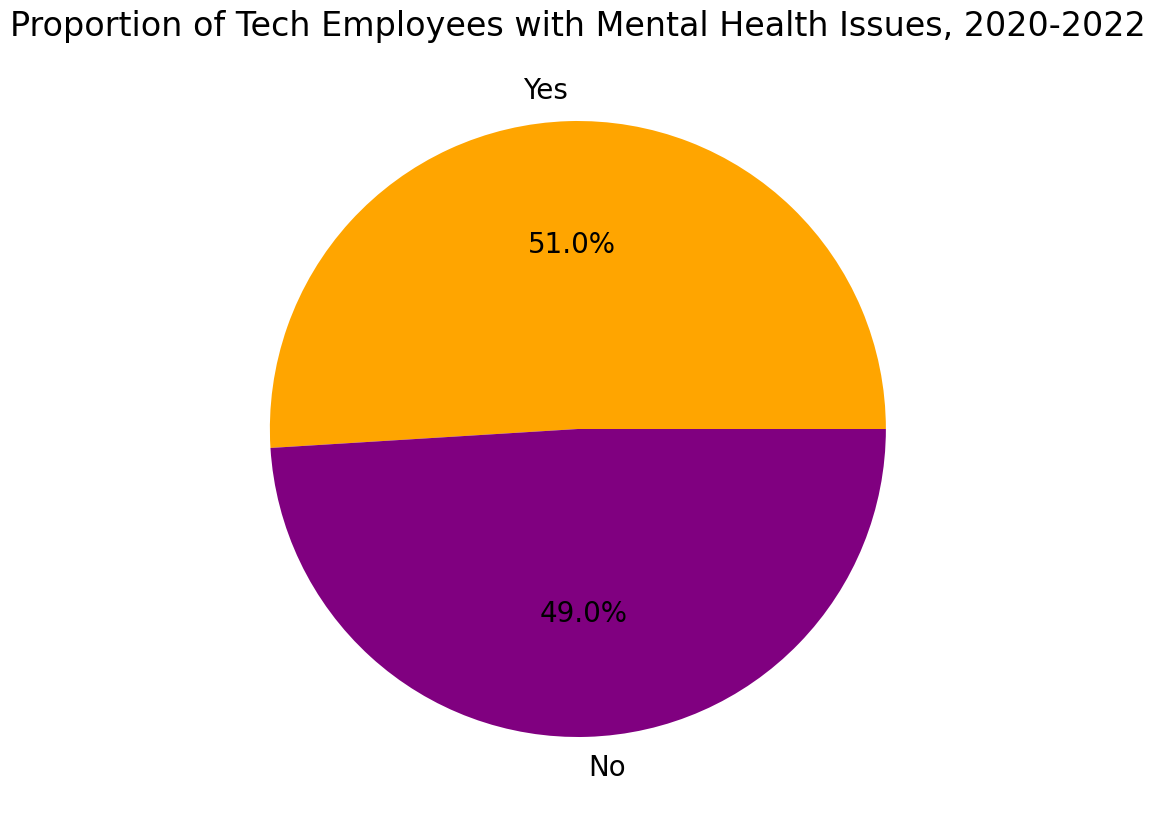

In [58]:
mental_health_issues_dataframe_2020_2022_breakdown = tech_2020_2022['Have you ever sought treatment for a mental health disorder from a mental health professional?'].value_counts()
colors = ["orange", "purple",]
labels = ["Yes", "No"]
plt.figure(figsize=(14,10))
plt.pie(mental_health_issues_dataframe_2020_2022_breakdown, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Proportion of Tech Employees with Mental Health Issues, 2020-2022', fontsize = 24)
plt.savefig('Exhibits/Proportion of Tech Employees with Mental Health Issues 2020-2022.png')
plt.show()

In [27]:
#Reducing down the data frame to give only those with mental health issues and the list of countries:
mental_health_issues_dataframe_2020_2022 = tech_2020_2022[tech_2020_2022['Have you ever sought treatment for a mental health disorder from a mental health professional?'] == 1]
mental_health_issues_dataframe_2020_2022.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Start Date (UTC),Submit Date (UTC),Network ID,Response Type,Tags
28,zbxgr0h0crwh8ujuplzbxgr0hk302zwg,0,26-100,1.0,1.0,Yes,Yes,I don't know,I don't know,I don't know,...,White,NaN,United States of America,Florida,NaN,NaN,NaN,NaN,NaN,NaN
29,zajfmuuax9ghv5zajfggt5osq6vy6dq8,0,500-1000,1.0,1.0,No,No,No,Yes,Yes,...,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,z51tyq30o2xt4yoqbhfz51xx1xzz3abm,0,More than 1000,1.0,1.0,Yes,No,Yes,Yes,Yes,...,NaN,NaN,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,vqwnlmwccmj4yhvybbp9vqwnlmeh3a8n,0,More than 1000,1.0,1.0,Yes,Yes,Yes,Yes,I don't know,...,NaN,Latino,United States of America,New York,NaN,NaN,NaN,NaN,NaN,NaN
41,v10llu898kfke6wmhbv10llu83gtmyea,0,26-100,1.0,1.0,No,NaN,No,No,I don't know,...,NaN,NaN,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Further reduce the dataframe down to just countries:
mental_health_issues_dataframe_2020_2022_countries = mental_health_issues_dataframe_2020_2022[['Have you ever sought treatment for a mental health disorder from a mental health professional?', 'What country do you *live* in?']]
mental_health_issues_dataframe_2020_2022_countries.head()

,Have you ever sought treatment for a mental health disorder from a mental health professional?,What country do you *live* in?
28,1,United States of America
29,1,India
30,1,Philippines
39,1,United States of America
41,1,Australia


<function matplotlib.pyplot.show(close=None, block=None)>

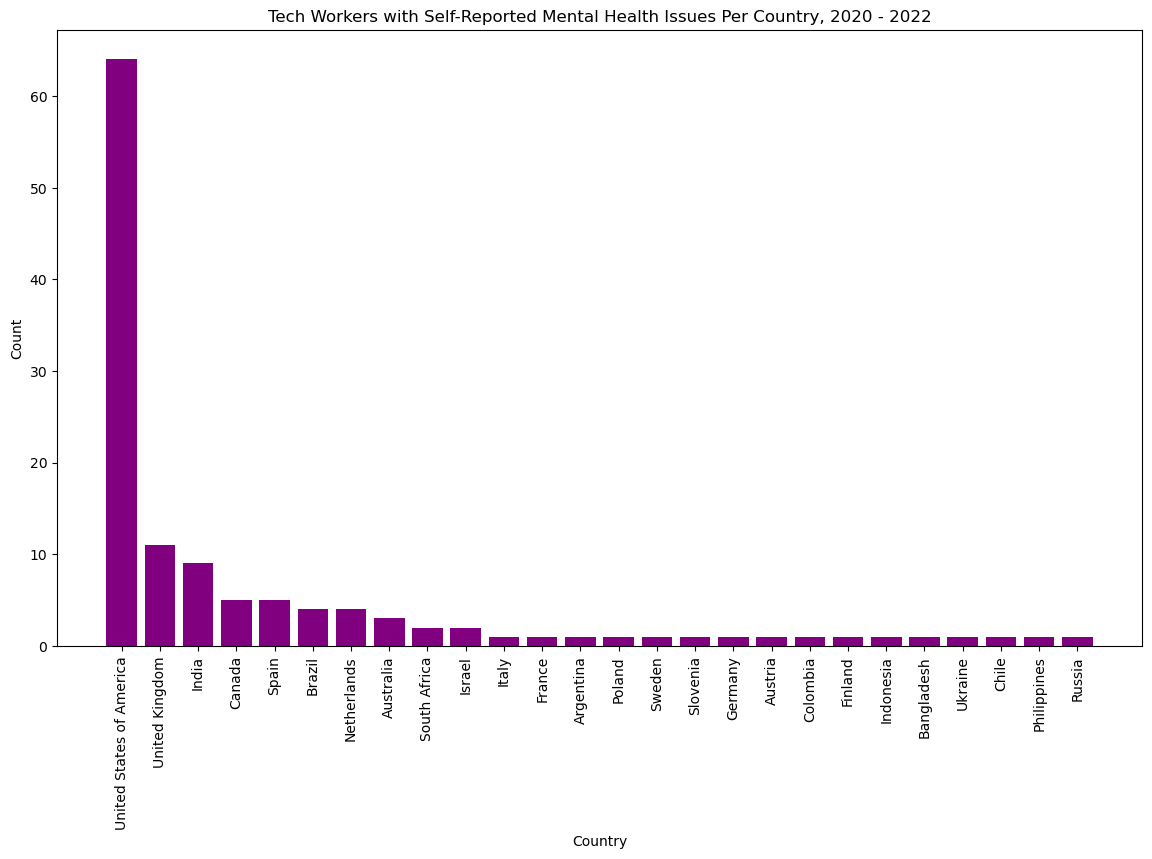

In [60]:
# Counting the number of occurences of mental health issues per country:
country_count_2020_2022 = mental_health_issues_dataframe_2020_2022_countries['What country do you *live* in?'].value_counts()

# Plotting the occurences per country in a bar graph:
plt.figure(figsize=(14,8))
plt.tight_layout()
plt.bar(country_count_2020_2022.index, country_count_2020_2022.values, color="purple")
plt.title('Tech Workers with Self-Reported Mental Health Issues Per Country, 2020 - 2022')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.savefig('Exhibits/Tech Workers With MH Issues Per Country 2020 to 2022.png')
plt.show

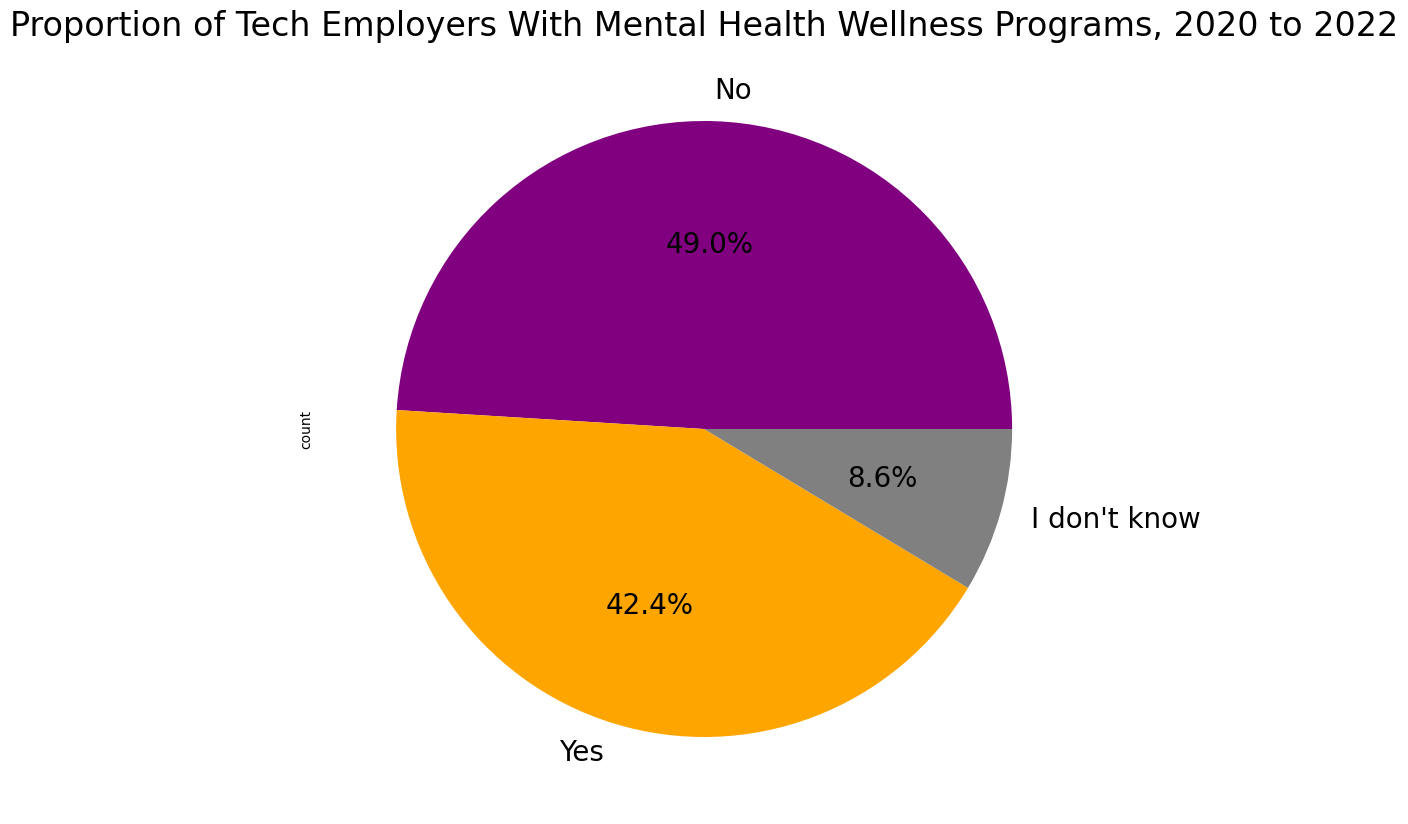

In [62]:
#2. Pie chart by employer wellness programs 
wellness_count=tech_2020_2022['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].value_counts()
colors = ["purple", "orange", "grey"]
plt.figure(figsize=(14,10))

wellness_count.plot(kind='pie',
                    colors=colors,
                    autopct='%1.1f%%', 
                    title='Proportion of Tech Employers With Mental Health Wellness Programs, 2020 to 2022', textprops={'fontsize': 20})
plt.title('Proportion of Tech Employers With Mental Health Wellness Programs, 2020 to 2022', fontsize=24)

plt.savefig('Exhibits/Prop of Tech Employers With Wellness Programs 2020 to 2022.png')

In [31]:
#3. Pie charts by remote vs. office-based workers -- no indicator for 2021 dataset 

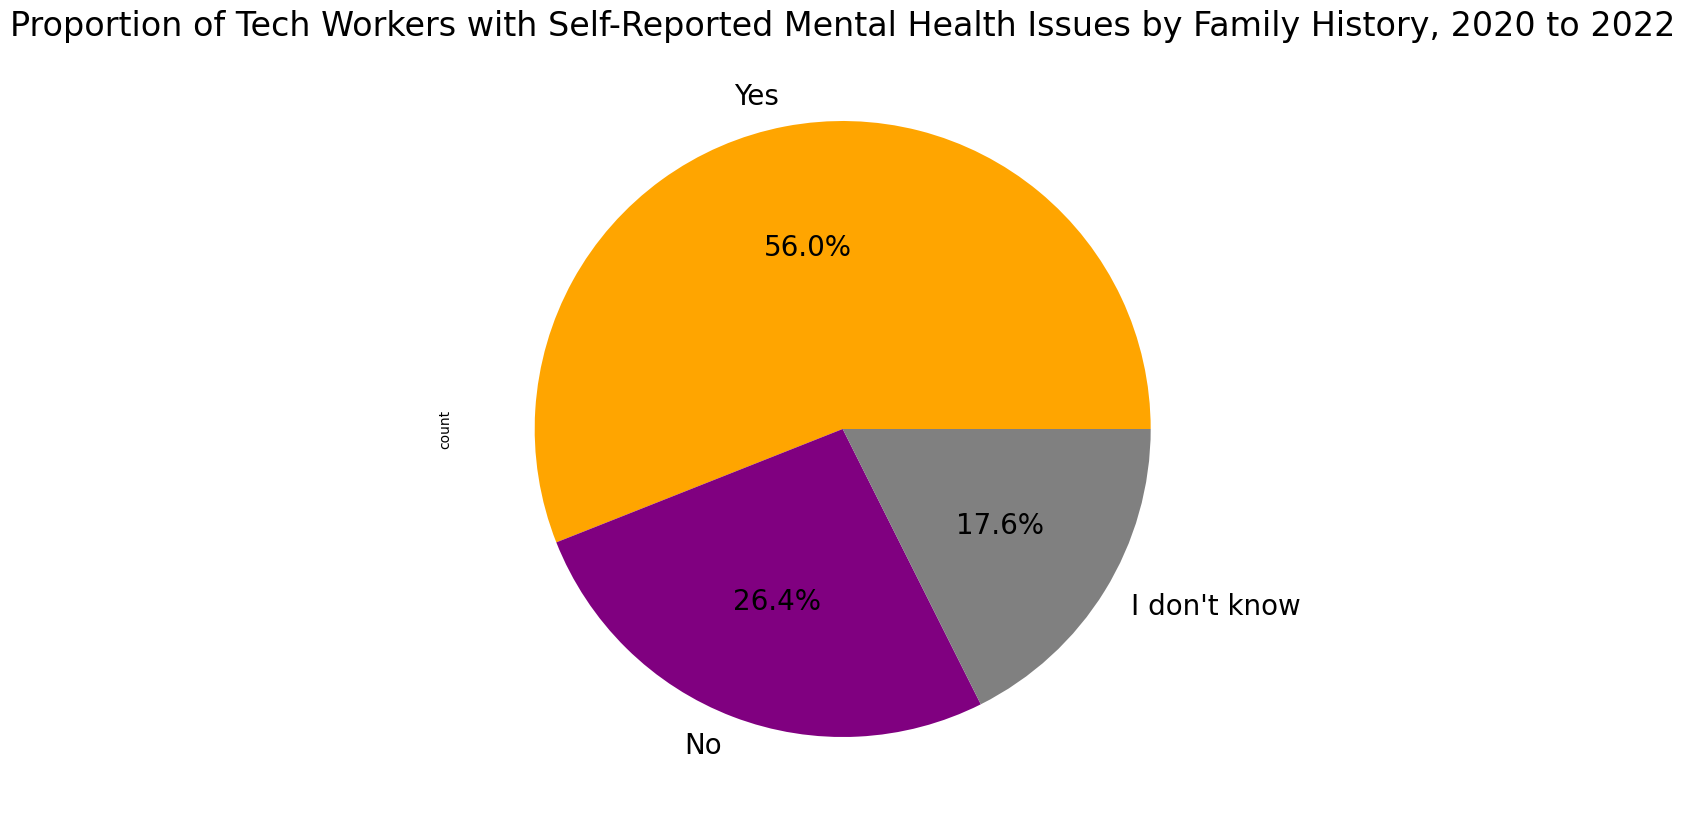

In [72]:
# Pie chart by family history of mental illness
family_history_2020_2022=mental_health_issues_dataframe_2020_2022['Do you have a family history of mental illness?'].value_counts()
colors = ["orange", "purple", "grey"]
plt.figure(figsize=(14,10))
family_history_2020_2022.plot(kind='pie',
                    autopct='%1.1f%%',
                    colors=colors,
                    title='Proportion of Tech Workers with Self-Reported Mental Health Issues by Family History, 2020 to 2022', textprops={'fontsize': 20})
plt.title('Proportion of Tech Workers with Self-Reported Mental Health Issues by Family History, 2020 to 2022', fontsize = 24)
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues by Family History 2020 to 2022.png')

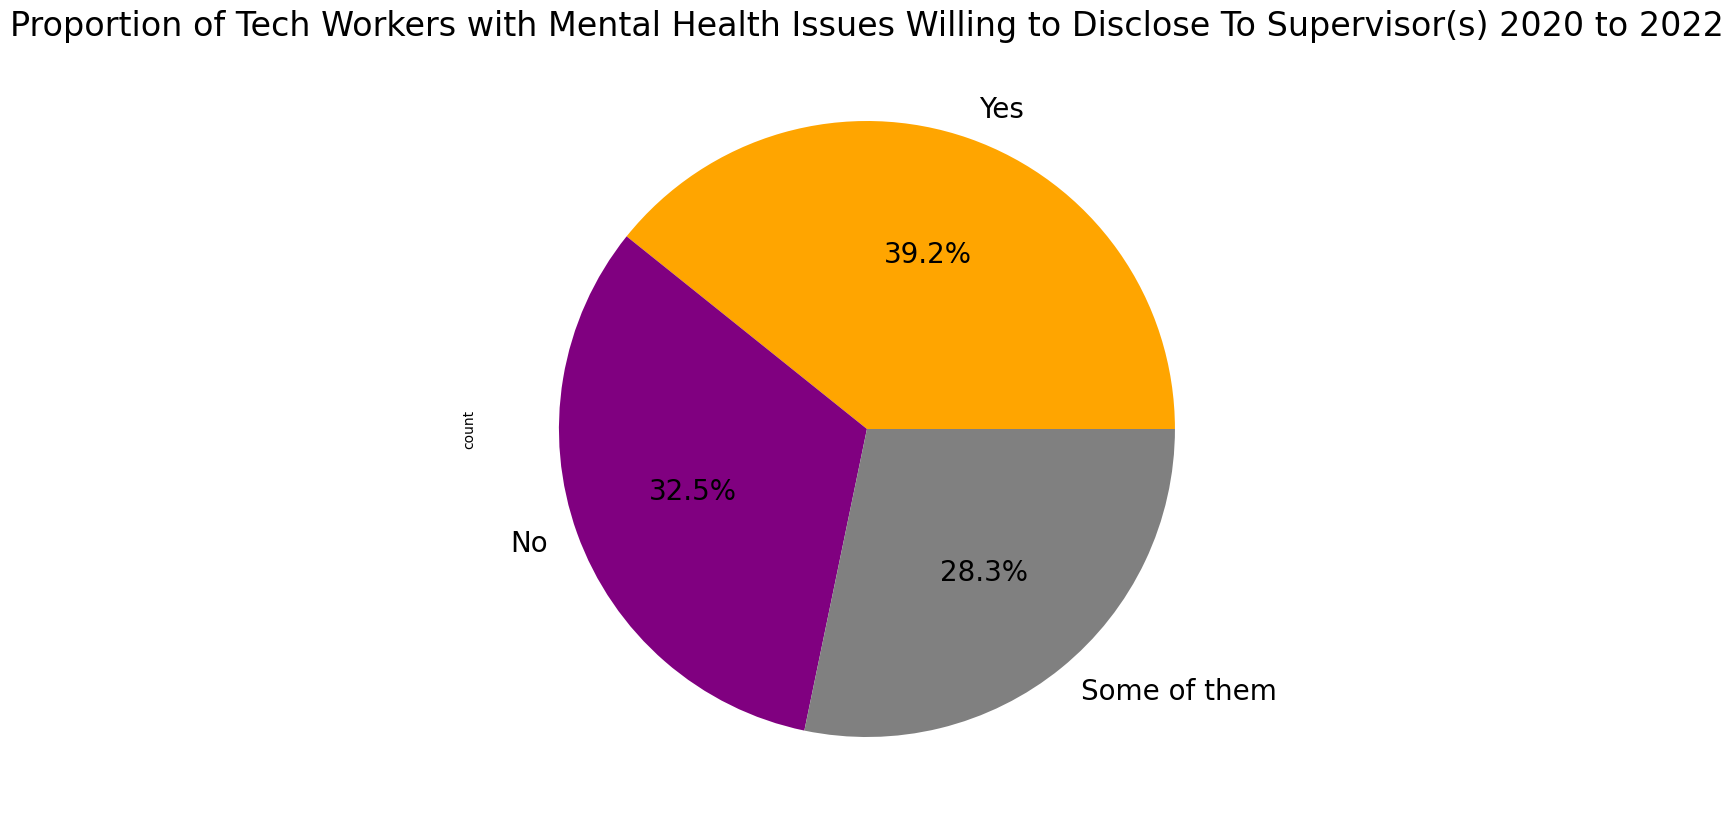

In [79]:
#5. Pie chart by workplace culture - Supervisors
workplace_culture_supervisors_2020_2022=mental_health_issues_dataframe_2020_2022['Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'].value_counts()
colors = ["orange", "purple", "grey"]
plt.figure(figsize=(14,10))
workplace_culture_supervisors.plot(kind='pie',
                       autopct='%1.1f%%',
                       colors=colors,
                       title='Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Supervisor(s) 2020 to 2022', textprops={'fontsize': 20})
plt.title('Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Supervisor(s) 2020 to 2022', fontsize = 24)
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues Willing To Disclose To Supervisor 2020 to 2022.png')

In [34]:
workplace_culture_coworkers_2020_2022=mental_health_issues_dataframe_2020_2022['Would you feel comfortable discussing a mental health issue with your coworkers?'].value_counts()
workplace_culture_coworkers_2020_2022.head()

Would you feel comfortable discussing a mental health issue with your coworkers?
Maybe    53
Yes      46
No       26
Name: count, dtype: int64

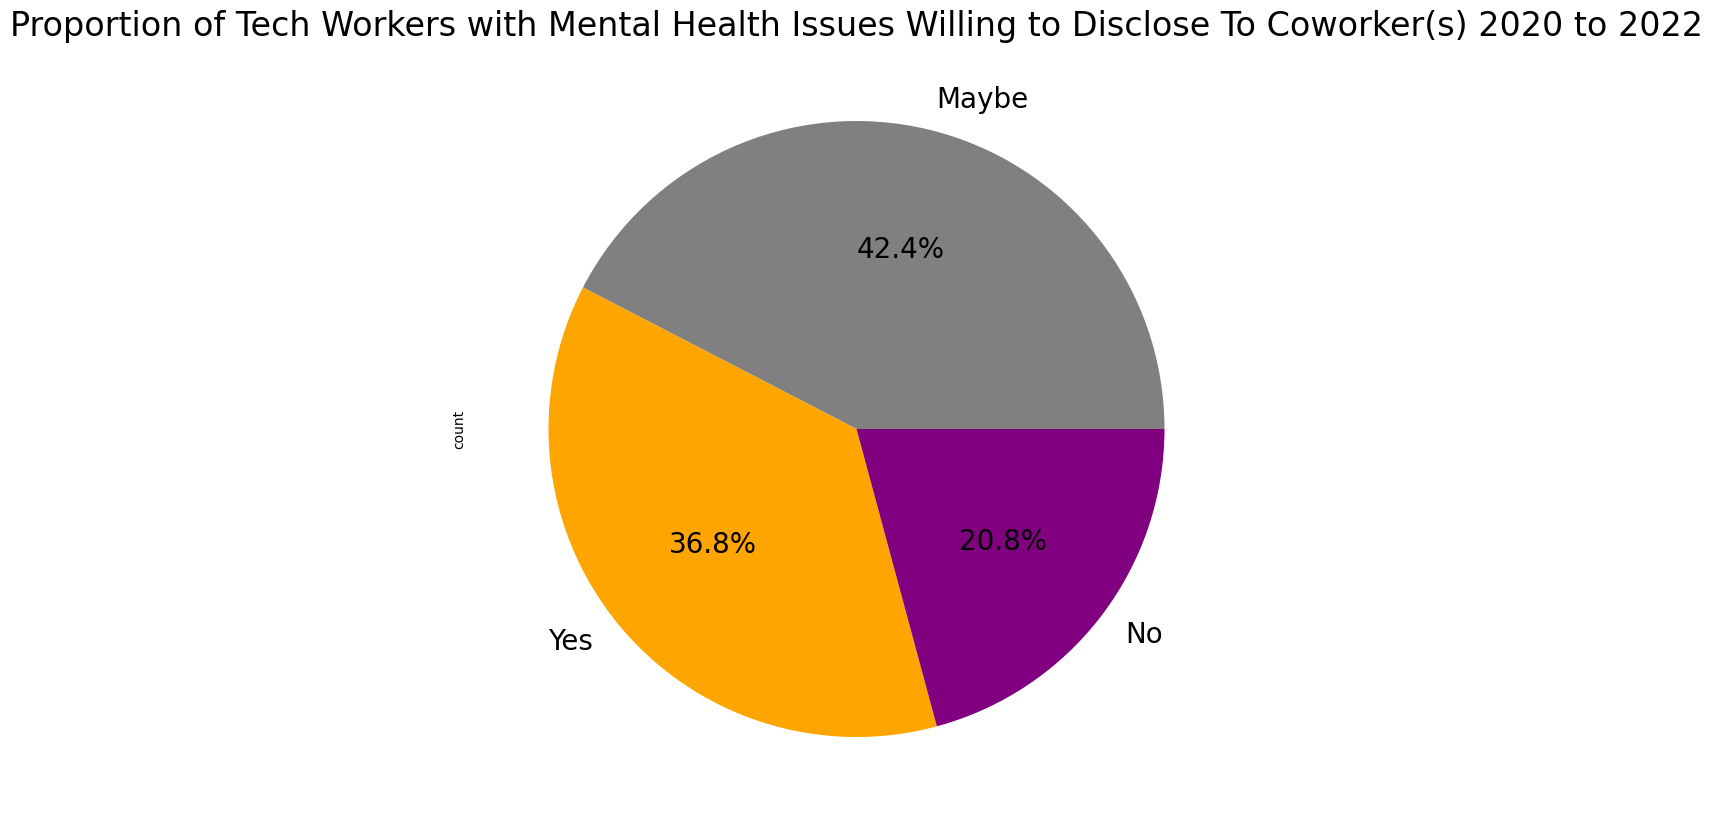

In [90]:
#5. Pie chart by workplace culture - Co-Workers
workplace_culture_coworkers_2020_2022=mental_health_issues_dataframe_2020_2022['Would you feel comfortable discussing a mental health issue with your coworkers?'].value_counts()
colors = ["grey", "orange", "purple"]
plt.figure(figsize=(14,10))
workplace_culture_coworkers_2020_2022.plot(kind='pie',
                       autopct='%1.1f%%',
                       colors=colors,
                       title='Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Coworker(s) 2020 to 2022', textprops={'fontsize': 20})
plt.title('Proportion of Tech Workers with Mental Health Issues Willing to Disclose To Coworker(s) 2020 to 2022', fontsize = 24)
plt.savefig('Exhibits/Prop of Tech Employees with MH Issues Willing To Disclose To Coworkers 2020 to 2022.png')

Ch-square statistical tests:

In [51]:
# PROPORTION SELF-REPORTING MENTAL HEALTH ISSUES:
# Convert index to column for both 2014 and 2020-2022 dataframes
MH_count_2014 = mental_health_issues_dataframe_2014_breakdown.reset_index()
MH_count_2014.columns = ['response', 'MH_count_2014']

MH_count_2020_2022 = mental_health_issues_dataframe_2020_2022_breakdown.reset_index()
MH_count_2020_2022.columns = ['response', 'MH_count_2020_2022']

# Harmonising response options in 2014 dataframe to match 2020-2022 dataframe so that 1=Yes and 0=No
MH_count_2014['response'] = MH_count_2014['response'].map({'Yes': '1', 'No': '0'})

# Convert response column in counts_2020_2022 dataframe to string type
MH_count_2020_2022['response'] = MH_count_2020_2022['response'].astype(str)

# Merge 2014 and 2020-2022 dataframes
merged_MH_count = pd.merge(MH_count_2014, MH_count_2020_2022, on='response', how='outer').fillna(0)
merged_MH_count.head()

,response,MH_count_2014,MH_count_2020_2022
0,1,637,125
1,0,622,130


In [54]:
# Chi-square test for independence compairing 2014 with 2020-2022
chi2_stat, p_value, dof, expected = chi2_contingency(merged_MH_count[['MH_count_2014', 'MH_count_2020_2022']])

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.15238065809599188
P-value: 0.6962706188056558
Degrees of Freedom: 1
Expected frequencies table:
[[633.65785997 128.34214003]
 [625.34214003 126.65785997]]


In [66]:
# PROPORTION OF EMPLPOYERS OFFERING MENTAL HEALTH WELLBEING PROGRAMS:
# Convert index to column for both 2014 and 2020-2022 dataframes
MHprograms_count_2014 = wellness_count_2014.reset_index()
MHprograms_count_2014.columns = ['response', 'MHprograms_count_2014']

MHprograms_count_2020_2022 = wellness_count.reset_index()
MHprograms_count_2020_2022.columns = ['response', 'MHprograms_count_2020_2022']

# Harmonising response options in 2014 dataframe to match 2020-2022 dataframe so that 1=Yes and 0=No
MHprograms_count_2014['response'] = MHprograms_count_2014['response'].map({'Yes': 'Yes', 'No': 'No', "Don't know" : "I don't know"})

# Convert response column in counts_2020_2022 dataframe to string type
MHprograms_count_2020_2022['response'] = MHprograms_count_2020_2022['response'].astype(str)

# Merge 2014 and 2020-2022 dataframes
merged_MHprograms_count = pd.merge(MHprograms_count_2014, MHprograms_count_2020_2022, on='response', how='outer').fillna(0)
merged_MHprograms_count.head()

,response,MHprograms_count_2014,MHprograms_count_2020_2022
0,No,842,125
1,Yes,229,108
2,I don't know,188,22


In [67]:
# Chi-square test for independence compairing 2014 with 2020-2022
chi2_stat, p_value, dof, expected = chi2_contingency(merged_MHprograms_count[['MHprograms_count_2014', 'MHprograms_count_2020_2022']])

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 72.2912818370366
P-value: 2.0051534056672776e-16
Degrees of Freedom: 2
Expected frequencies table:
[[804.13011889 162.86988111]
 [280.23976222  56.76023778]
 [174.63011889  35.36988111]]


In [76]:
# PROPORTION OF EMPLOYEES WITH MENTAL HEALTH ISSUES REPORTING A FAMILY HISTORY OF MENTAL ILLNESS:
# Convert index to column for both 2014 and 2020-2022 dataframes
FamilyHX_count_2014 = family_history_2014.reset_index()
FamilyHX_count_2014.columns = ['response', 'FamilyHX_count_2014']

FamilyHX_count_2020_2022 = family_history_2020_2022.reset_index()
FamilyHX_count_2020_2022.columns = ['response', 'FamilyHX_count_2020_2022']

# Filter out 'I Don't know' response option from 2020-2022 dataframe as was not an option provided in the 2014 dataframe
FamilyHX_count_2020_2022_filtered = FamilyHX_count_2020_2022[FamilyHX_count_2020_2022['response'].isin(['Yes', 'No'])]

# Merge 2014 and 2020-2022 dataframes
merged_FamilyHX_count = pd.merge(FamilyHX_count_2014, FamilyHX_count_2020_2022_filtered, on='response', how='outer').fillna(0)
merged_FamilyHX_count.head()

,response,FamilyHX_count_2014,FamilyHX_count_2020_2022
0,Yes,365,70
1,No,272,33


In [77]:
# Chi-square test for independence compairing 2014 with 2020-2022
chi2_stat, p_value, dof, expected = chi2_contingency(merged_FamilyHX_count[['FamilyHX_count_2014', 'FamilyHX_count_2020_2022']])

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 3.731107238577941
P-value: 0.053407978893641156
Degrees of Freedom: 1
Expected frequencies table:
[[374.4527027  60.5472973]
 [262.5472973  42.4527027]]


In [86]:
# PROPORTION OF EMPLOYEES WITH MENTAL HEALTH ISSUES WILLING TO DISCLOSE TO SUPERVISORS:
# Convert index to column for both 2014 and 2020-2022 dataframes
Supervisors_count_2014 = workplace_culture_supervisors.reset_index()
Supervisors_count_2014.columns = ['response', 'Supervisors_count_2014']

Supervisors_count_2020_2022 = workplace_culture_supervisors_2020_2022.reset_index()
Supervisors_count_2020_2022.columns = ['response', 'Supervisors_count_2020_2022']

# Harmonising response options in 2014 dataframe to match 2020-2022 dataframe so that 1=Yes and 0=No
Supervisors_count_2014['response'] = Supervisors_count_2014['response'].map({'Yes': 'Yes', 'No': 'No', "Some of them" : "Maybe"})

# Convert response column in counts_2020_2022 dataframe to string type
Supervisors_count_2020_2022['response'] = Supervisors_count_2020_2022['response'].astype(str)

# Merge 2014 and 2020-2022 dataframes
merged_Supervisors_count = pd.merge(Supervisors_count_2014, Supervisors_count_2020_2022, on='response', how='outer').fillna(0)
merged_Supervisors_count.head()

,response,Supervisors_count_2014,Supervisors_count_2020_2022
0,Yes,250,49
1,No,207,38
2,Maybe,180,38


In [88]:
# Chi-square test for independence compairing 2014 with 2020-2022
chi2_stat, p_value, dof, expected = chi2_contingency(merged_Supervisors_count[['Supervisors_count_2014', 'Supervisors_count_2020_2022']])

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.31051603369824377
P-value: 0.8561942364424604
Degrees of Freedom: 2
Expected frequencies table:
[[249.95144357  49.04855643]
 [204.80971129  40.19028871]
 [182.23884514  35.76115486]]


In [92]:
# PROPORTION OF EMPLOYEES WITH MENTAL HEALTH ISSUES WILLING TO DISCLOSE TO CO-WORKERS:
# Convert index to column for both 2014 and 2020-2022 dataframes
CoWorkers_count_2014 = workplace_culture_coworkers.reset_index()
CoWorkers_count_2014.columns = ['response', 'CoWorkers_count_2014']

CoWorkers_count_2020_2022 = workplace_culture_coworkers_2020_2022.reset_index()
CoWorkers_count_2020_2022.columns = ['response', 'CoWorkers_count_2020_2022']

# Harmonising response options in 2014 dataframe to match 2020-2022 dataframe so that 1=Yes and 0=No
CoWorkers_count_2014['response'] = CoWorkers_count_2014['response'].map({'Yes': 'Yes', 'No': 'No', "Some of them" : "Maybe"})

# Convert response column in counts_2020_2022 dataframe to string type
CoWorkers_count_2020_2022['response'] = CoWorkers_count_2020_2022['response'].astype(str)

# Merge 2014 and 2020-2022 dataframes
merged_CoWorkers_count = pd.merge(CoWorkers_count_2014, CoWorkers_count_2020_2022, on='response', how='outer').fillna(0)
merged_CoWorkers_count.head()

,response,CoWorkers_count_2014,CoWorkers_count_2020_2022
0,Maybe,390,53
1,Yes,128,46
2,No,119,26


In [95]:
# Chi-square test for independence compairing 2014 with 2020-2022
chi2_stat, p_value, dof, expected = chi2_contingency(merged_CoWorkers_count[['CoWorkers_count_2014', 'CoWorkers_count_2020_2022']])

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 19.38710665339287
P-value: 6.167984592433984e-05
Degrees of Freedom: 2
Expected frequencies table:
[[370.32939633  72.67060367]
 [145.45669291  28.54330709]
 [121.21391076  23.78608924]]
